# CAPM - Capital Assest Pricing Model

Portfolio Returns: 

## $r_p(t) = \sum\limits_{i}^{n}w_i r_i(t)$  

Market Returns:  

## $ w_i = \frac{MarketCap_i}{\sum_{j}^{n}{MarketCap_j}} $  


CAPM of a Portfolio:  

## $ r_p(t) = \beta_pr_m(t) + \sum\limits_{i}^{n}w_i \alpha_i(t)$

**Modelling CAPM as a Regression**

In [39]:
from scipy import stats

In [40]:
help(stats.linregress)

Help on function linregress in module scipy.stats._stats_mstats_common:

linregress(x, y=None)
    Calculate a linear least-squares regression for two sets of measurements.
    
    Parameters
    ----------
    x, y : array_like
        Two sets of measurements.  Both arrays should have the same length.
        If only x is given (and y=None), then it must be a two-dimensional
        array where one dimension has length 2.  The two sets of measurements
        are then found by splitting the array along the length-2 dimension.
    
    Returns
    -------
    slope : float
        slope of the regression line
    intercept : float
        intercept of the regression line
    rvalue : float
        correlation coefficient
    pvalue : float
        two-sided p-value for a hypothesis test whose null hypothesis is
        that the slope is zero, using Wald Test with t-distribution of
        the test statistic.
    stderr : float
        Standard error of the estimated gradient.
    
  

In [41]:
import pandas as pd
import pandas_datareader as web

In [42]:
start = pd.to_datetime('2014-01-01')
end = pd.to_datetime('2019-01-01')

In [43]:
spy_etf = web.DataReader('SPY','iex', start, end)
spy_etf.index = pd.to_datetime(spy_etf.index)
spy_etf.head()

,open,high,low,close,volume
date,,,,,
2014-01-13,166.3839,166.8096,164.2374,164.5499,149891938
2014-01-14,165.0888,166.4382,164.7899,166.3477,105016055
2014-01-15,166.7371,167.4979,166.3841,167.2443,98525721
2014-01-16,166.9001,167.2459,166.4926,167.0269,72290520
2014-01-17,166.7371,167.0541,166.0307,166.3160,107848616


In [44]:
aapl = web.DataReader('AAPL','iex', start, end)
aapl.index = pd.to_datetime(aapl.index)
aapl.head()

,open,high,low,close,volume
date,,,,,
2014-01-13,69.4767,71.1274,69.4728,70.2398,94860843
2014-01-14,70.5663,71.6820,70.4928,71.6374,83734371
2014-01-15,72.5722,73.4481,72.3284,73.0757,98472619
2014-01-16,72.7532,73.0088,72.3310,72.6680,57471330
2014-01-17,72.3048,72.3821,70.7865,70.8875,108426689


In [45]:
import matplotlib.pyplot as plt

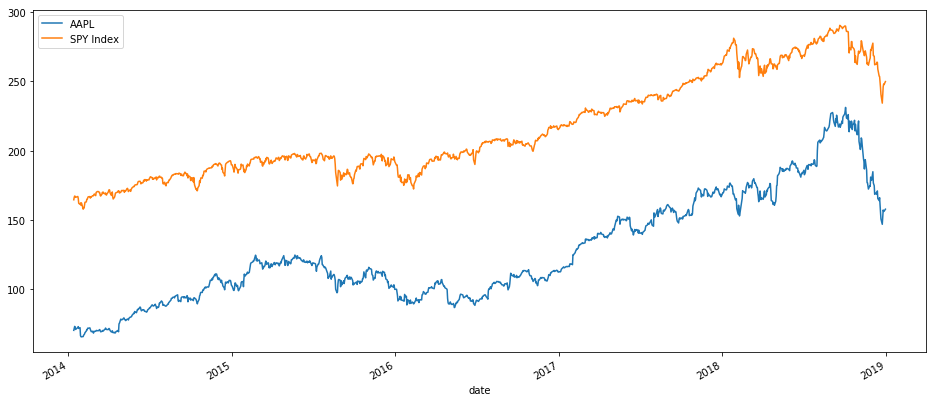

In [48]:
aapl['close'].plot(label = 'AAPL', figsize = (16,7))
spy_etf['close'].plot(label = 'SPY Index')
plt.legend();

### Comparing the Cumulative Return

In [49]:
aapl['cumulative'] = aapl['close']/aapl['close'].iloc[0]
spy_etf['cumulative'] = spy_etf['close']/spy_etf['close'].iloc[0]

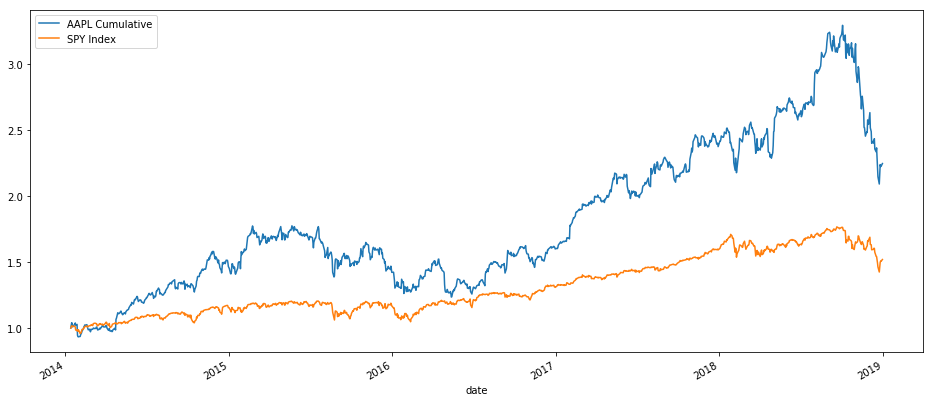

In [52]:
aapl['cumulative'].plot(label = 'AAPL Cumulative', figsize = (16,7))
spy_etf['cumulative'].plot(label = 'SPY Index')
plt.legend();

### Get Daily Return

In [53]:
aapl['daily return'] = aapl['close'].pct_change(1)
spy_etf['daily return'] = spy_etf['close'].pct_change(1)

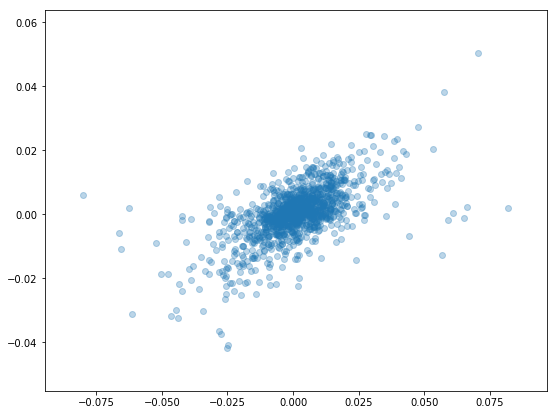

In [58]:
plt.figure(figsize= (9,7))
plt.scatter(aapl['daily return'], spy_etf['daily return'], alpha= 0.3);

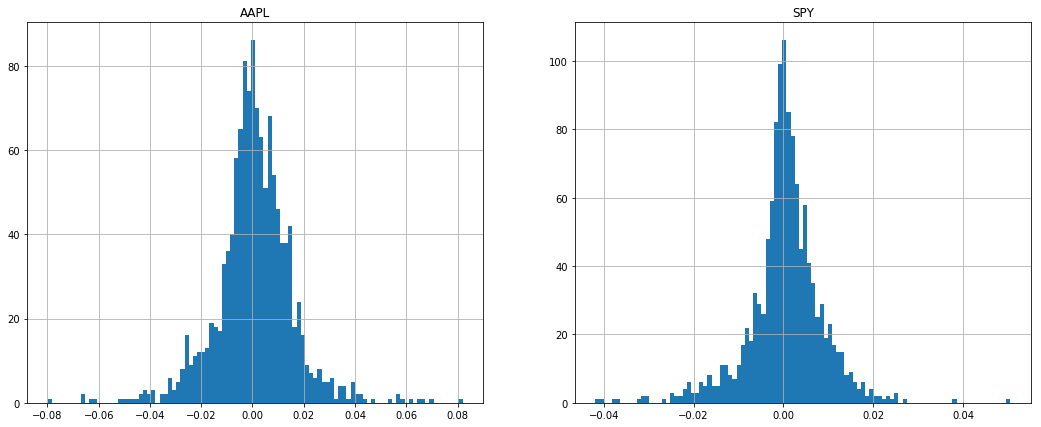

In [70]:
plt.figure(figsize= (18,7))
plt.subplot(1,2,1)
aapl['daily return'].hist(bins = 100)
plt.title('AAPL')
plt.subplot(1,2,2)
spy_etf['daily return'].hist(bins = 100)
plt.title('SPY')
plt.show()

In [75]:
beta , alpha, r_value, p_value, std_err  = stats.linregress(aapl['daily return'].dropna(),
                                                           spy_etf['daily return'].dropna()) #Beta - slope, alpha - intercept

The more the linear relation the more the *Beta* value and less the *alpha* value.

In [80]:
beta

0.34174380194301873

In [81]:
alpha

0.00010861214467516059

In [82]:
r_value

0.6222459971532368

### If our stocks was strongly related

We will make a **fake_stock** strongly related to **spy_etf** to get our point through that CAP model works

In [106]:
import numpy as np

In [113]:
spy_etf.dropna(inplace = True)

In [114]:
noise = np.random.normal(0,0.002, len(spy_etf['daily return']))

In [115]:
spy_etf['daily return']+ noise

date
2014-01-14    0.007297
2014-01-15    0.003269
2014-01-16   -0.001189
2014-01-17   -0.004464
2014-01-21    0.001726
2014-01-22    0.000049
2014-01-23   -0.010234
2014-01-24   -0.020715
2014-01-27   -0.002547
2014-01-28    0.003454
2014-01-29   -0.011899
2014-01-30    0.010353
2014-01-31   -0.005831
2014-02-03   -0.023147
2014-02-04    0.008237
2014-02-05   -0.001384
2014-02-06    0.013669
2014-02-07    0.008609
2014-02-10    0.002688
2014-02-11    0.010463
2014-02-12    0.000338
2014-02-13    0.009729
2014-02-14    0.007822
2014-02-18    0.003836
2014-02-19   -0.008808
2014-02-20    0.009489
2014-02-21   -0.001753
2014-02-24    0.008365
2014-02-25   -0.003188
2014-02-26    0.001100
                ...   
2018-11-15    0.007318
2018-11-16    0.003553
2018-11-19   -0.014859
2018-11-20   -0.017721
2018-11-21    0.005845
2018-11-23   -0.007762
2018-11-26    0.017446
2018-11-27   -0.001455
2018-11-28    0.022747
2018-11-29   -0.000914
2018-11-30    0.004732
2018-12-03    0.012674
2018-1

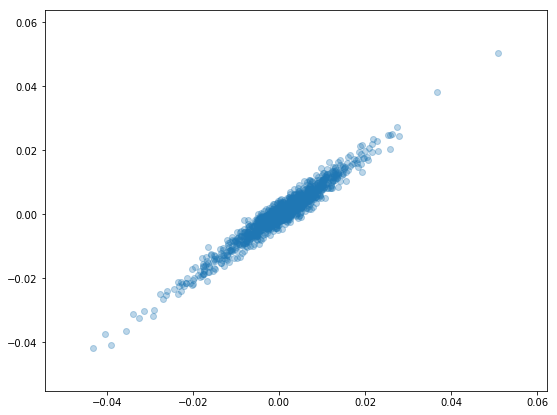

In [119]:
plt.figure(figsize= (9,7))
plt.scatter(spy_etf['daily return'] + noise, spy_etf['daily return'], alpha= 0.3);

we can see that our made up model is pretty well linearly related. Now lets check our Beta and Alpha values for this.

In [116]:
beta, alpha, r_value, p_value, std_err = stats.linregress(spy_etf['daily return'] + noise,
                                                          spy_etf['daily return'])

In [117]:
beta

0.9434929621395342

In [118]:
alpha

-7.85396472738346e-05

Seems our uderstanding is correct.

### de nada!